In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\fkokr\.conda\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
df1 = df.drop(columns = ['koi_disposition'])

In [6]:
df1

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
0                 0              0              0              0   54.418383   
1                 0              1              0              0   19.899140   
2                 0              1              0              0    1.736952   
3                 0              0              0              0    2.525592   
4                 0              0              0              0    4.134435   
...             ...            ...            ...            ...         ...   
6986              0              0              0              1    8.589871   
6987              0              1              1              0    0.527699   
6988              0              0              0              0    1.739849   
6989              0              0              1              0    0.681402   
6990              0              0              1              1    4.856035   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
0        2.479000e-04    -2.479000e-04   162.513840          0.003520   
1        1.490000e-05    -1.490000e-05   175.850252          0.000581   
2        2.630000e-07    -2.630000e-07   170.307565          0.000115   
3        3.760000e-06    -3.760000e-06   171.595550          0.001130   
4        1.050000e-05    -1.050000e-05   172.979370          0.001900   
...               ...              ...          ...               ...   
6986     1.846000e-04    -1.846000e-04   132.016100          0.015700   
6987     1.160000e-07    -1.160000e-07   131.705093          0.000170   
6988     1.780000e-05    -1.780000e-05   133.001270          0.007690   
6989     2.430000e-06    -2.430000e-06   132.181750          0.002850   
6990     6.360000e-05    -6.360000e-05   135.993300          0.010800   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0            -0.003520  ...             -81      4.467           0.064   
1            -0.000581  ...            -176      4.544           0.044   
2            -0.000115  ...            -174      4.564           0.053   
3            -0.001130  ...            -211      4.438           0.070   
4            -0.001900  ...            -232      4.486           0.054   
...                ...  ...             ...        ...             ...   
6986         -0.015700  ...            -152      4.296           0.231   
6987         -0.000170  ...            -166      4.529           0.035   
6988         -0.007690  ...            -220      4.444           0.056   
6989         -0.002850  ...            -236      4.447           0.056   
6990         -0.010800  ...            -225      4.385           0.054   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0             -0.096     0.927          0.105         -0.061  291.93423   
1             -0.176     0.868          0.233         -0.078  297.00482   
2             -0.168     0.791          0.201         -0.067  285.53461   
3             -0.210     1.046          0.334         -0.133  288.75488   
4             -0.229     0.972          0.315         -0.105  296.28613   
...              ...       ...            ...            ...        ...   
6986          -0.189     1.088          0.313         -0.228  298.74921   
6987          -0.196     0.903          0.237         -0.079  297.18875   
6988          -0.224     1.031          0.341         -0.114  286.50937   
6989          -0.224     1.041          0.341         -0.114  294.16489   
6990          -0.216     1.193          0.410         -0.137  297.00977   

            dec  koi_kepmag  
0     48.141651      15.347  
1     48.134129      15.436  
2     48.285210      15.597  
3     48.226200      15.509  
4     48.224670      15.714  
...         ...         ...  
6986  46.973351      14.478  
6987  47.093819      14.082  
6988  47.163219      14.757  
6989  47.176281      15.385  
6990  47.121021      14.826  

[6991 rows x 40 c

In [7]:
#list(df.columns)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
from sklearn.model_selection import train_test_split
X  = df1
y = df['koi_disposition']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [9]:
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
4002              0              0              1              0   99.673478   
4246              0              1              0              0    0.592244   
548               0              1              1              0    9.991625   
3953              0              1              0              0  178.412990   
2362              0              0              0              0   45.294223   

      koi_period_err1  koi_period_err2  koi_time0bk  koi_time0bk_err1  \
4002     3.463000e-04    -3.463000e-04   219.334830          0.002300   
4246     9.000000e-08    -9.000000e-08   131.654831          0.000124   
548      5.360000e-06    -5.360000e-06   137.447816          0.000445   
3953     3.100000e-05    -3.100000e-05   218.225235          0.000127   
2362     5.600000e-05    -5.600000e-05   138.678725          0.000987   

      koi_time0bk_err2  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
4002         -0.002300  ...            -148      4.777           0.040   
4246         -0.000124  ...            -146      4.664           0.056   
548          -0.000445  ...            -176      4.338           0.153   
3953         -0.000127  ...            -134      4.346           0.084   
2362         -0.000987  ...             -68      4.347           0.030   

      koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
4002          -0.027     0.492          0.026         -0.027  293.05801   
4246          -0.032     0.591          0.045         -0.045  290.28094   
548           -0.187     1.096          0.309         -0.206  301.04239   
3953          -0.126     1.148          0.202         -0.124  288.32785   
2362          -0.030     1.044          0.057         -0.042  285.67938   

            dec  koi_kepmag  
4002  45.248821      15.801  
4246  45.464260      15.653  
548   45.022888      14.039  
3953  38.627621      13.944  
2362  50.241299      10.961  

[5 rows x 40 columns]

In [10]:
y_train.shape

(5243,)

In [11]:
X_train.shape

(5243, 40)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [13]:
X_train_scaled.shape

(5243, 40)

# K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.796
k: 3, Train/Test Score: 0.896/0.810
k: 5, Train/Test Score: 0.873/0.825
k: 7, Train/Test Score: 0.869/0.819
k: 9, Train/Test Score: 0.857/0.820
k: 11, Train/Test Score: 0.850/0.820
k: 13, Train/Test Score: 0.849/0.817
k: 15, Train/Test Score: 0.846/0.817
k: 17, Train/Test Score: 0.842/0.814
k: 19, Train/Test Score: 0.838/0.816
k: 21, Train/Test Score: 0.837/0.818
k: 23, Train/Test Score: 0.834/0.815
k: 25, Train/Test Score: 0.833/0.812
k: 27, Train/Test Score: 0.831/0.811
k: 29, Train/Test Score: 0.830/0.813
k: 31, Train/Test Score: 0.829/0.815
k: 33, Train/Test Score: 0.829/0.819
k: 35, Train/Test Score: 0.829/0.818
k: 37, Train/Test Score: 0.829/0.815
k: 39, Train/Test Score: 0.830/0.814
k: 41, Train/Test Score: 0.830/0.814
k: 43, Train/Test Score: 0.829/0.810
k: 45, Train/Test Score: 0.830/0.812
k: 47, Train/Test Score: 0.829/0.814
k: 49, Train/Test Score: 0.830/0.816


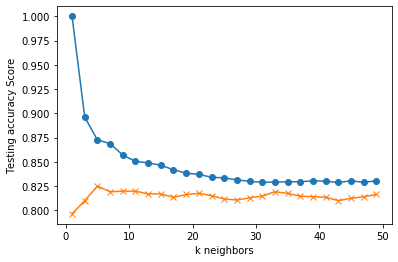

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Train the Model



In [23]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train_scaled, y_train)
print('k=33 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=33 Test Acc: 0.819


In [24]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.829105473965287
Testing Data Score: 0.8192219679633868


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [27]:
poss_k = list(range(1, 50, 2))

In [42]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': poss_k,
             'weights': ['uniform','distance'],
             'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),
                   param_grid,
                   verbose = 1,
                   cv = 3,
                   n_jobs = -1)

In [43]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
0.8416920015875532


# Save the Model

In [45]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'kneighbors_FK.sav'
joblib.dump(0.841692, filename)

['kneighbors_FK.sav']